In [12]:
import pandas as pd
import numpy as np
%matplotlib inline
from statsmodels.tsa.stattools import adfuller


In [3]:
import warnings
warnings.filterwarnings("ignore")

df1 = pd.read_csv(r"..\Data\airline_passengers.csv", index_col='Month', parse_dates=True)
df1.index.freq = 'MS'

df2 = pd.read_csv(r"..\Data\DailyTotalFemaleBirths.csv", index_col='Date', parse_dates=True)
df2.index.freq = 'D'

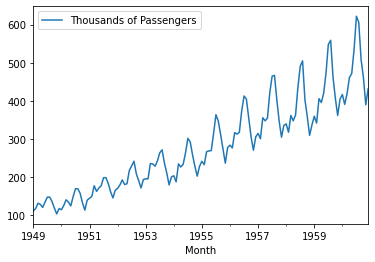

In [4]:
df1.plot()

In [6]:
adfuller(df1['Thousands of Passengers'])

(0.8153688792060433,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [8]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}.
    regression : {'c','ct','ctt','nc'}
        Constant and trend order to include in regression.
    
        * 'c' : constant only (default).
        * 'ct' : constant and trend.
        * 'ctt' : constant, and linear and quadratic trend.
        * 'nc' : no constant, no trend.
    
    autolag : {'AIC', 'BIC', 't-stat', None}
        Method to use when automatically determining the lag.
    
        * if None, then maxlag lags are used.
        * if 'AIC' (default) or 

In [9]:
dftest = adfuller(df1['Thousands of Passengers'])
dfout = pd.Series(dftest[0:4], index=['ADF Test Statistic', 'p-value', '# Lags Used', '# Observations'])

In [10]:
for key, val in dftest[4].items():
    dfout[f'critical value ({key})'] = val

In [11]:
dfout

ADF Test Statistic        0.815369
p-value                   0.991880
# Lags Used              13.000000
# Observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64

In [13]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())          # .to_string() removes the line "dtype: float64"

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")


In [14]:
adf_test(df1['Thousands of Passengers'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


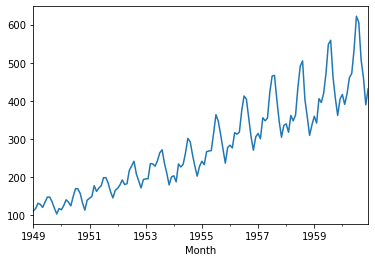

In [15]:
df1['Thousands of Passengers'].plot()

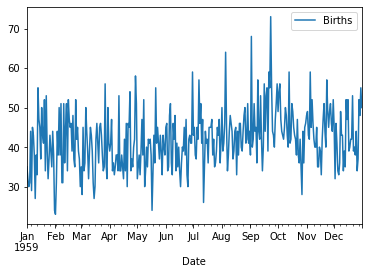

In [16]:
df2.plot()

In [17]:
adf_test(df2['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [18]:
df3 = pd.read_csv(r'..\Data\samples.csv', index_col=0, parse_dates=True)
df3.index.freq = 'MS'

In [19]:
df3

,a,b,c
1950-01-01,36,27,0
1950-02-01,58,22,3
1950-03-01,61,17,5
1950-04-01,37,15,8
1950-05-01,66,13,8
...,...,...,...
1959-08-01,49,73,9338
1959-09-01,41,77,9502
1959-10-01,64,70,9667
1959-11-01,37,87,9833


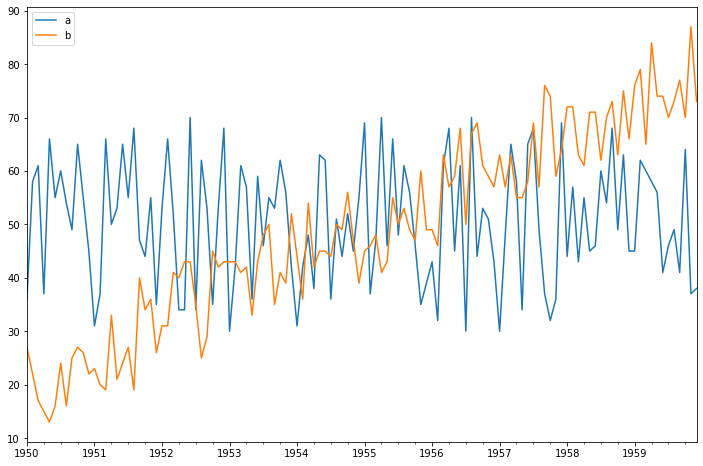

In [20]:
df3[['a', 'b']].plot(figsize=(12, 8))

In [21]:
from statsmodels.tsa.stattools import grangercausalitytests

In [22]:
grangercausalitytests(df3[['a', 'b']], maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8657  , p=0.1746  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.9140  , p=0.1665  , df=1
likelihood ratio test: chi2=1.8988  , p=0.1682  , df=1
parameter F test:         F=1.8657  , p=0.1746  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9723  , p=0.1439  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=4.1192  , p=0.1275  , df=2
likelihood ratio test: chi2=4.0489  , p=0.1321  , df=2
parameter F test:         F=1.9723  , p=0.1439  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1777  , p=0.3216  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=3.7580  , p=0.2888  , df=3
likelihood ratio test: chi2=3.6989  , p=0.2959  , df=3
parameter F test:         F=1.1777  , p=0.3216  , df_denom=110, df_num=3


In [24]:
np.random.seed(42)

df = pd.DataFrame(np.random.randint(20, 30, (50, 2)), columns=['test', 'predictions'])

In [25]:
df.head()

,test,predictions
0,26,23
1,27,24
2,26,29
3,22,26
4,27,24


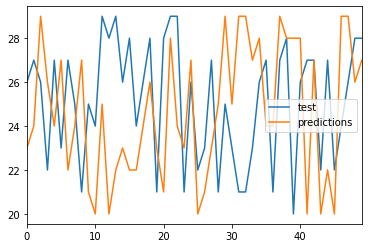

In [26]:
df.plot()

In [27]:
from statsmodels.tools.eval_measures import mse, rmse, meanabs

In [28]:
mse(df['test'], df['predictions'])

17.02

In [29]:
meanabs(df['test'], df['predictions'])

3.54

In [30]:
df = pd.read_csv(r"..\Data\airline_passengers.csv", index_col='Month', parse_dates=True)

In [31]:
df.index.freq = 'MS'

In [32]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


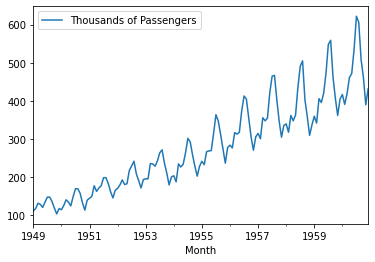

In [33]:
df.plot();

In [34]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

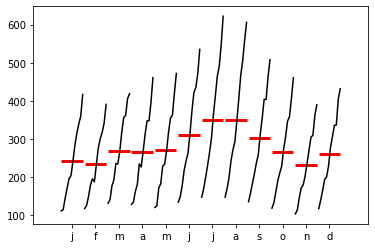

In [35]:
month_plot(df['Thousands of Passengers']);

In [36]:
dfq = df['Thousands of Passengers'].resample(rule='Q').mean()

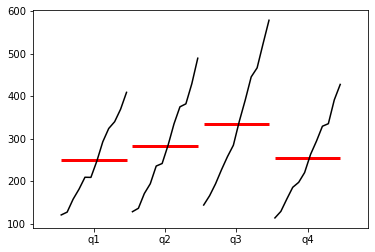

In [38]:
quarter_plot(dfq);